In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ppo_csv_filename = 'mario_ddqn.csv'

In [2]:
# Load the data
file_path = ppo_csv_filename
data = pd.read_csv(file_path)

# Convert columns to proper format if needed (e.g., removing spaces)
data.columns = data.columns.str.strip()

# Line plot: Reward vs Episode
plt.figure(figsize=(12, 6))
plt.plot(data['Episode'], data['Reward'], label='Reward', linewidth=0.8, color='blue')
plt.title('Reward vs Episode', fontsize=16)
plt.xlabel('Episode', fontsize=12)
plt.ylabel('Reward', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Save plot for user inspection
plt.savefig('ppo-reward_vs_episode-line_plot.png')
plt.show()


KeyError: 'Episode'

<Figure size 1200x600 with 0 Axes>

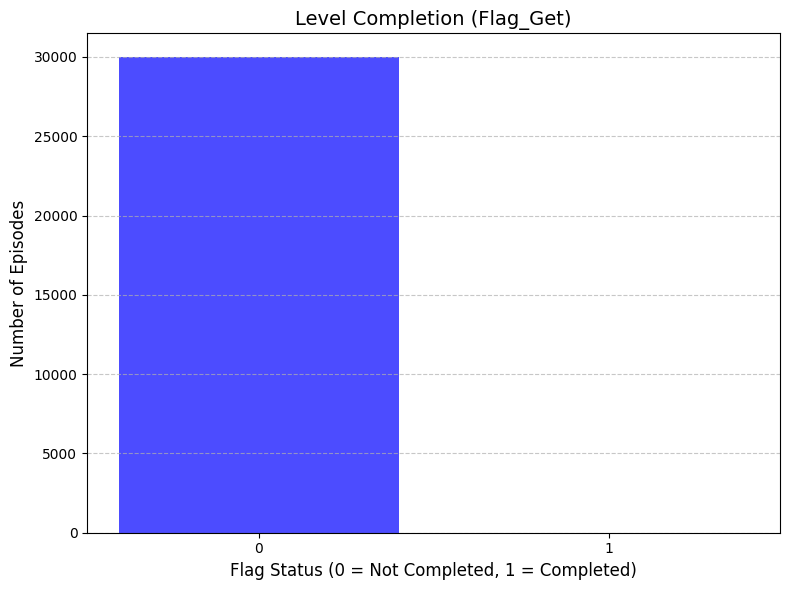

In [16]:
# Load the data
file_path = ppo_csv_filename
data = pd.read_csv(file_path)

# Count the number of completed and non-completed episodes
flag_counts = data['Flag_Get'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(flag_counts.index.astype(str), flag_counts.values, color='blue', alpha=0.7)
plt.title('Level Completion (Flag_Get)', fontsize=14)
plt.xlabel('Flag Status (0 = Not Completed, 1 = Completed)', fontsize=12)
plt.ylabel('Number of Episodes', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save and show the plot
plt.savefig('ppo-flag_get_plot-histogram.png')  # Saves the plot to a file
plt.show()

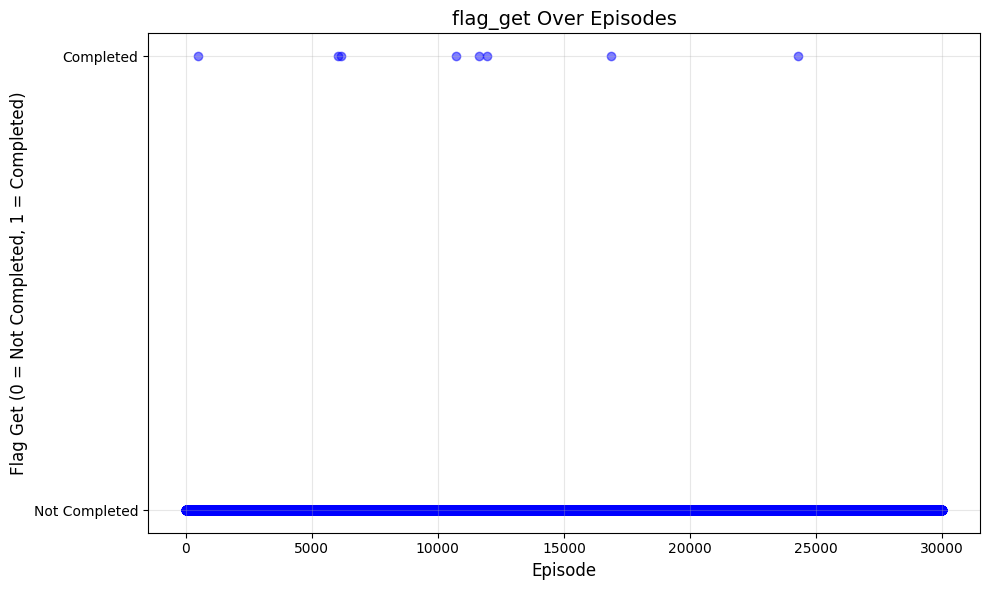

In [19]:
# Load the data
file_path = ppo_csv_filename
data = pd.read_csv(file_path)

# Count the number of completed and non-completed episodes
flag_counts = data['Flag_Get'].value_counts()

# Timeline plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Episode'], data['Flag_Get'], alpha=0.5, color='blue')
plt.title('Flag_Get Over Episodes', fontsize=14)
plt.xlabel('Episode', fontsize=12)
plt.ylabel('Flag_Get (0 = Not Completed, 1 = Completed)', fontsize=12)
plt.yticks([0, 1], ['Not Completed', 'Completed'], fontsize=10)
plt.xticks(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Save and show the plot
plt.savefig('ppo-flag_get_log_plot-scatter.png')  # Saves the plot to a file
plt.show()


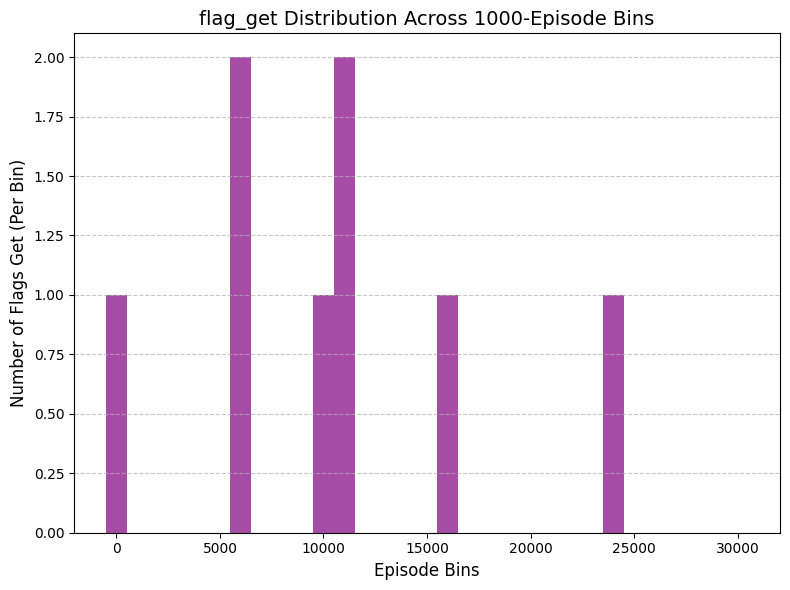

In [2]:
# Load the data
file_path = ppo_csv_filename
data = pd.read_csv(file_path)

# Bin the episodes and flag_get counts
bin_size = 1000  # Episodes per bin
data['Episode_Bin'] = (data['Episode'] // bin_size) * bin_size
heatmap_data = data.groupby('Episode_Bin')['Flag_Get'].sum().reset_index()

# Create heatmap
plt.figure(figsize=(8, 6))
plt.bar(heatmap_data['Episode_Bin'], heatmap_data['Flag_Get'], width=bin_size, color='purple', alpha=0.7)
plt.title(f'Flag_Get Distribution Across {bin_size}-Episode Bins', fontsize=14)
plt.xlabel('Episode Bins', fontsize=12)
plt.ylabel('Number of Flags Get (Per Bin)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save and show the plot
plt.savefig('ppo-flag_get_log_plot-heatmap.png')  # Saves the plot to a file
plt.show()